In [5]:
metebolite = read.csv('./LM2021-12430-东部战区总医院-小鼠肠道组织//LM2021-12430-东部战区总医院-小鼠肠道组织-LCMS-EMDB(项目报告)/3.数据矩阵/metabolomics_data-new.csv',row.names = 1,check.names = F)

In [6]:
cnumber = read.csv('/data/workdirV6/cnumber.csv')

In [7]:
head(cnumber,2)

,Metabolites,kegg
,<chr>,<chr>
1,4-Aminohippuric acid,D06890
2,Imidazolepropionic acid,C20522


In [8]:
head(metebolite,3)

,KO-CLP1,KO-CLP2,KO-CLP3,KO-CLP4,KO-CLP5,KO-CLP6,KO-CLP7,KO-CLP8,KO-NC1,KO-NC2,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"LysoPC(20:4(5Z,8Z,11Z,14Z))",86674.91,218881.9,280332.4,178108.1,119883.5,32693.82,345224.2,119606,153810.9,328915.6,⋯,20661.54,104916,5804.184,133204.6,243141,277966.9,146089.6,230441.2,140556.2,298852.5
LysoPC(18:0),2009726.48,3334212.1,2450525.1,2989967.5,1876162.6,348891.23,2963804.6,2351682,2083188.4,3155221.3,⋯,263312.66,1680189,207871.058,1864903.1,2001310,3029537.8,1408620.2,2274919.8,1574928.0,2431254.0
LysoPC(16:0),1579107.80,3615409.8,2907057.4,2807052.4,1526425.9,322352.47,2937266.5,2201086,2147221.6,3849853.9,⋯,226300.02,1396375,86323.033,2145121.0,2460418,3234021.7,1665112.1,2431493.2,1641919.2,3368434.8


In [10]:
group= rep(c('KO.CLP','KO.NC','WT.CLP','WT.NC'),each = 8)

In [11]:
colnames(metebolite) = group
    avereps_df<- t(limma::avereps(t(metebolite), ID = colnames(metebolite)))    
    avereps_df=avereps_df[rowMeans(avereps_df)>1,]

In [14]:
avereps_df['9,12,13-TriHOME',]

KO.CLP     KO.NC    WT.CLP     WT.NC 
 6160.423 23216.804 11890.839 20731.928

In [6]:
count = dplyr::left_join(cnumber,metebolite)

Joining with `by = join_by(Metabolites)`


In [7]:
library(openxlsx)

Warning message:
“package ‘openxlsx’ was built under R version 4.2.3”


In [8]:
wtclpvswtnc <- read.xlsx("./LM2021-12430-东部战区总医院-小鼠肠道组织//LM2021-12430-东部战区总医院-小鼠肠道组织-LCMS-EMDB(项目报告)/6.差异代谢物/差异代谢物.xlsx", sheet = 2)

In [9]:
koclpvswtclp <- read.xlsx("./LM2021-12430-东部战区总医院-小鼠肠道组织//LM2021-12430-东部战区总医院-小鼠肠道组织-LCMS-EMDB(项目报告)/6.差异代谢物/差异代谢物.xlsx", sheet = 4)

In [10]:
diffkegg = c(wtclpvswtnc$kegg,koclpvswtclp$kegg)

In [11]:
diffkegg = na.omit(diffkegg)

In [12]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [13]:
diffcount = na.omit(count)

In [35]:
pathway = read.csv('/data/workdirV6/KEGG_COMPOUND_PATHWAY_mmu.csv')

In [38]:
pathway = pathway[,c('PATHWAY_MAP','COMPOUND')]

In [39]:
head(pathway,3)

,PATHWAY_MAP,COMPOUND
,<chr>,<chr>
1,Glycolysis / Gluconeogenesis,C00022
2,Glycolysis / Gluconeogenesis,C00024
3,Glycolysis / Gluconeogenesis,C00031


In [40]:
colnames(pathway) = c('pathwayname','kegg')

In [41]:
pathway = pathway[,c(2,1)]

In [42]:
dim(diffcount)

[1] 964  34

In [43]:
head(diffcount,2)

,kegg,Metabolites,KO-CLP1,KO-CLP2,KO-CLP3,KO-CLP4,KO-CLP5,KO-CLP6,KO-CLP7,KO-CLP8,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,D06890,4-Aminohippuric acid,1907.673,2107.08,1207.031,1977.161,1654.022,1380.053,2304.817,1341.836,⋯,1125.518,1537.946,1442.455,1537.936,1434.894,1907.736,1878.776,2409.686,2057.97,2120.096
2,C20522,Imidazolepropionic acid,734048.661,964779.26,663989.770,753755.744,760825.481,789032.203,683587.932,696858.954,⋯,736643.996,783907.458,732337.213,974556.630,801616.569,848251.350,1000744.254,920192.053,874865.73,1121065.615


In [44]:
diffcount = diffcount[,c(2,1,3:34)]

In [45]:
heat = merge(pathway,diffcount,by = 'kegg')

In [46]:
heat = unique(heat)

In [47]:
head(heat,3)

,kegg,pathwayname,Metabolites,KO-CLP1,KO-CLP2,KO-CLP3,KO-CLP4,KO-CLP5,KO-CLP6,KO-CLP7,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,C00016,Vitamin digestion and absorption,FAD,48468.35,63872.39,24233.33,50405.59,65613.46,52507.49,70502.77,⋯,43014.26,45924.57,52259.21,50191.05,43677.84,41603.68,45101.81,34957.89,37741.19,50691.60
2,C00016,Riboflavin metabolism,FAD,48468.35,63872.39,24233.33,50405.59,65613.46,52507.49,70502.77,⋯,43014.26,45924.57,52259.21,50191.05,43677.84,41603.68,45101.81,34957.89,37741.19,50691.60
3,C00020,mTOR signaling pathway,Adenosine monophosphate,27998.52,38348.67,16087.01,15269.83,29201.37,16026.64,22482.76,⋯,18903.96,18091.83,33150.20,44166.00,39488.26,14876.48,35349.70,23671.59,35615.09,30056.85


In [48]:
heat <- heat[!duplicated(heat$kegg), ]

In [49]:
zhu = data.frame(table(heat$pathwayname))

zhu$ID <- as.numeric(rownames(zhu))

In [50]:
number_of_bar <- nrow(zhu)
angle <-  90 - 360 * (zhu$ID-0.5) /23
zhu$hjust<-ifelse(angle < -90, 1, 0)
zhu$angle<-ifelse(angle < -90, angle+180, angle)

In [51]:
library(ggplot2)

In [52]:
p1 <- ggplot(zhu, aes(x=ID, y=Freq))+
  geom_bar(stat="identity", fill="blue", alpha=0.7) +
  ylim(-75,75) +#y轴范围，控制内圆大小与条形大小
  theme_minimal() +#主题
  theme(axis.text = element_blank(),
        axis.title = element_blank(),
        panel.grid = element_blank(),
        plot.margin = unit(rep(-1,4), "cm")) +#调整边缘以使得标签不会被截断
  coord_polar(start = 0) +#极坐标
  geom_text(data=zhu, aes(x=ID, y=Freq+10, label=Var1, hjust=hjust), 
            color="black", fontface="bold",alpha=0.6, size=6, 
            angle= zhu$angle, inherit.aes = F) #标签


In [53]:
options(repr.plot.height = 16,repr.plot.width = 16 )

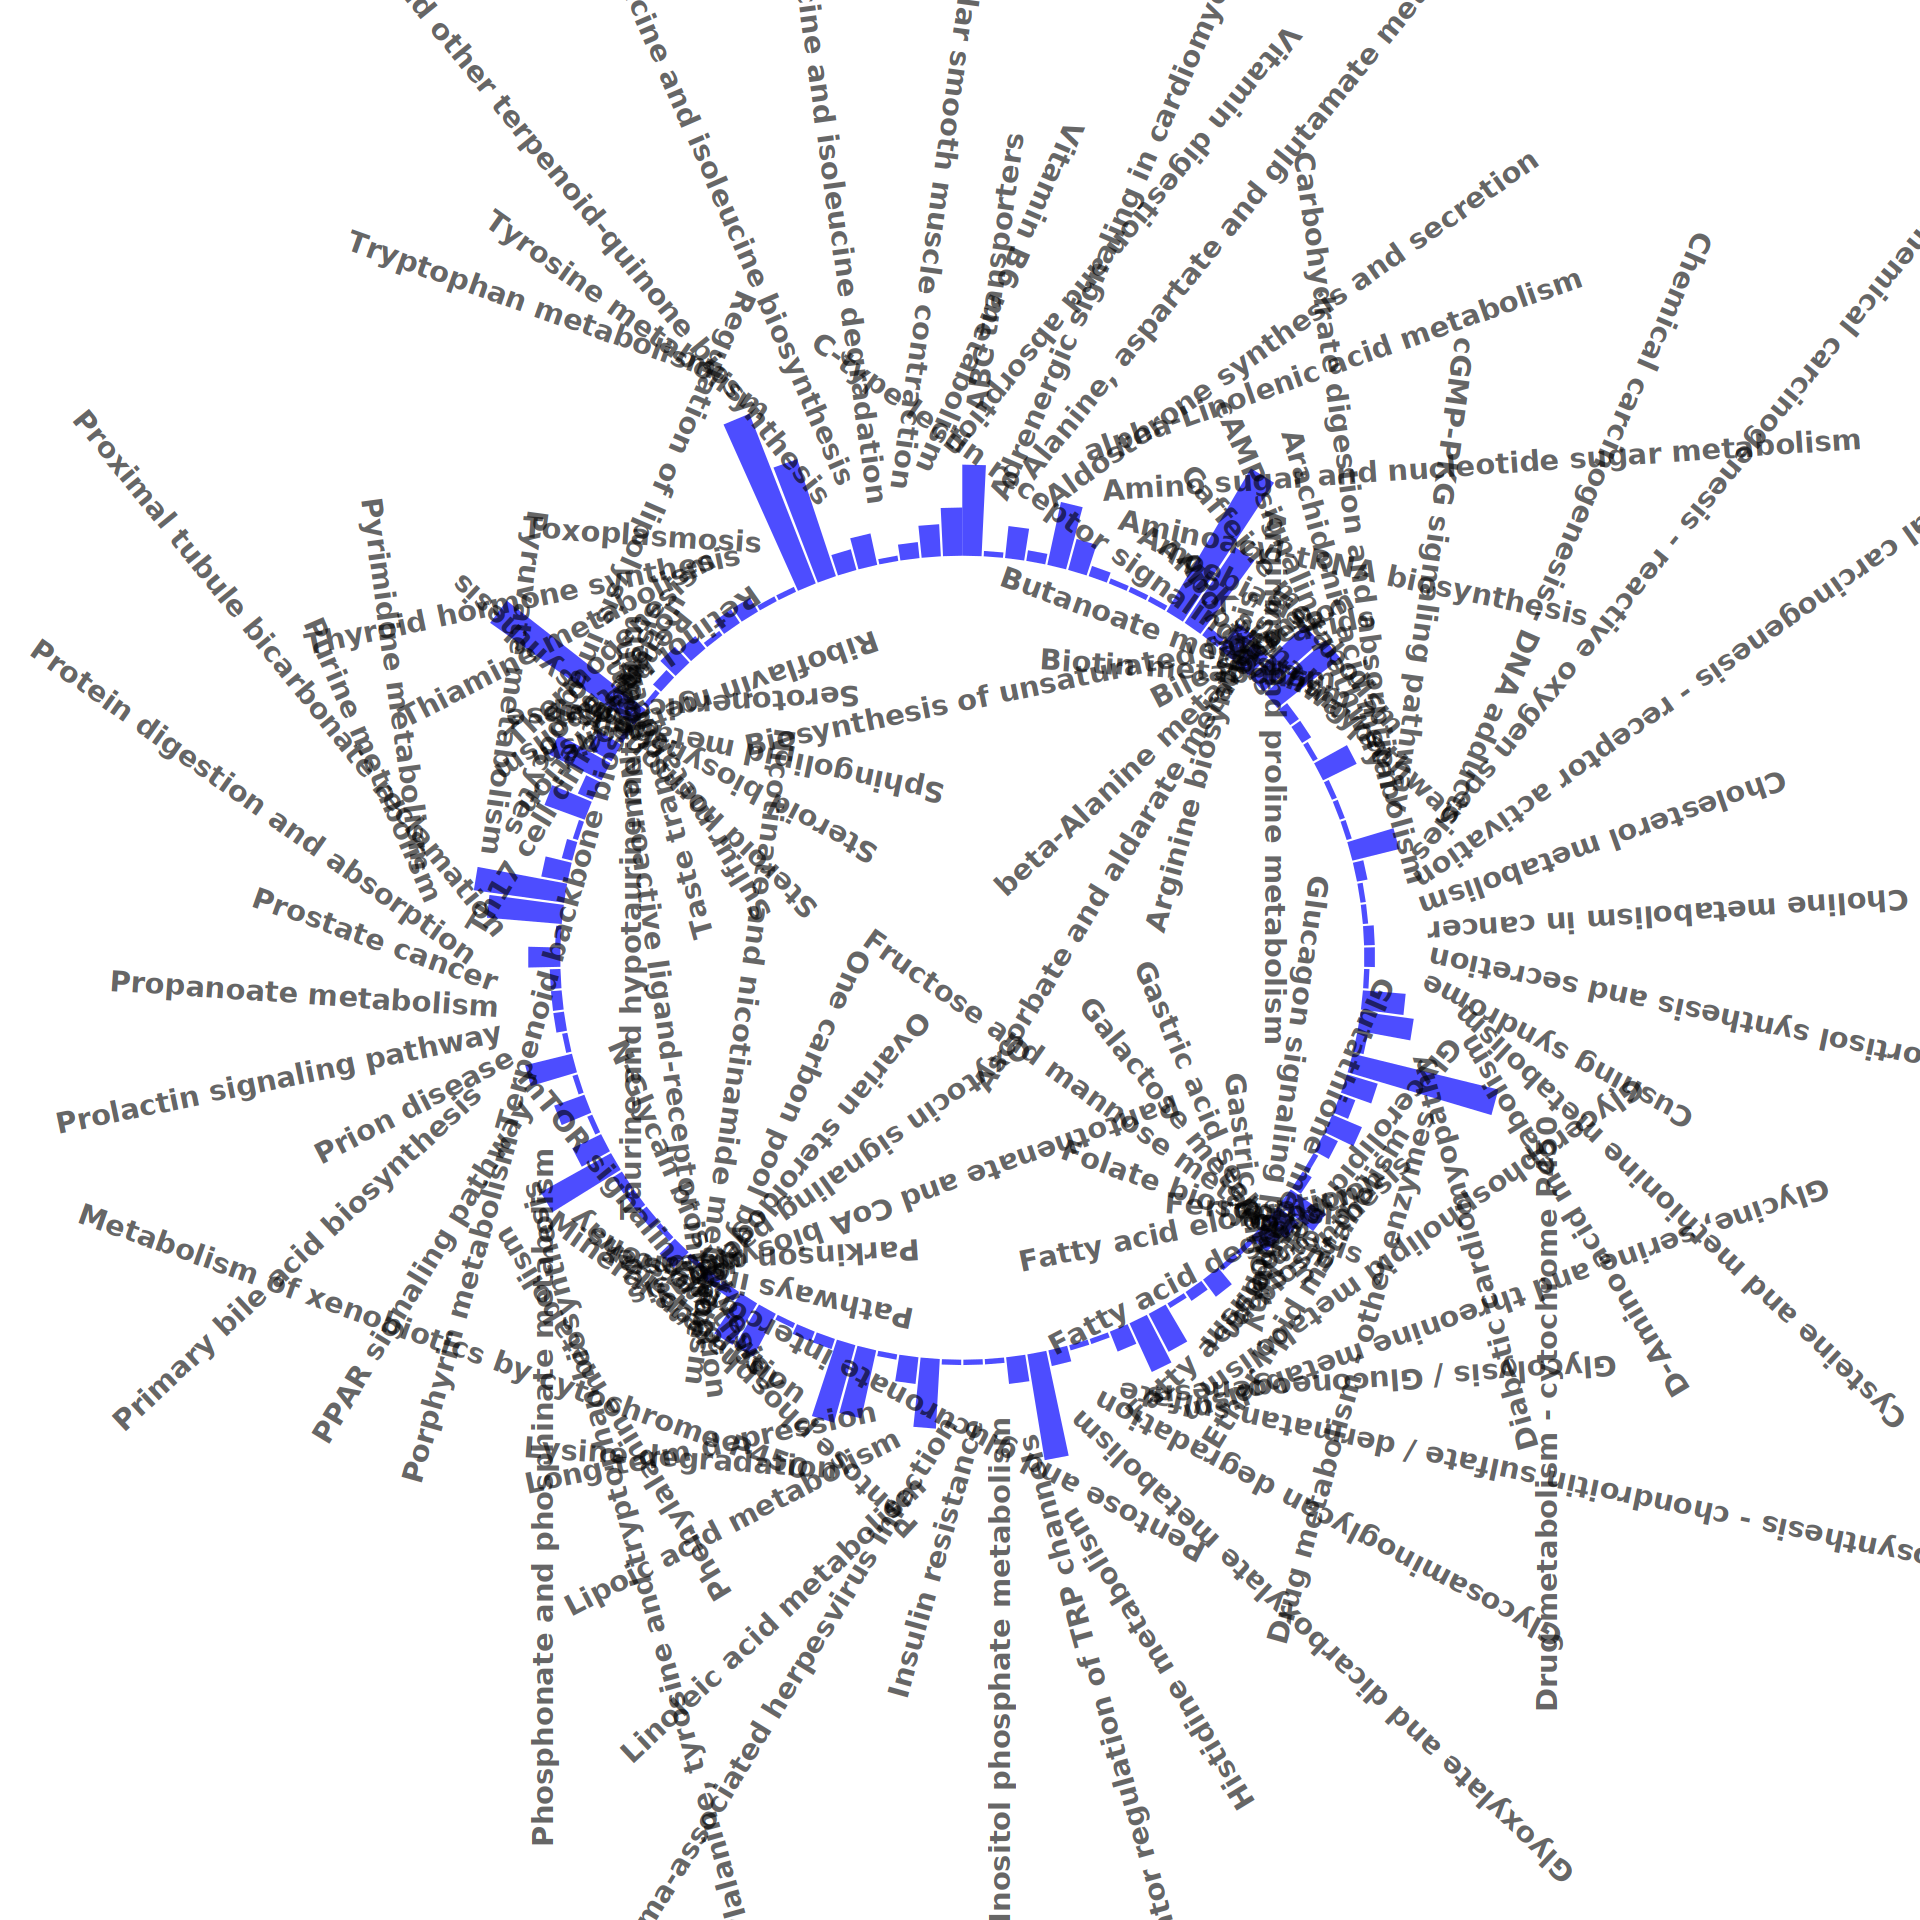

In [54]:
p1

In [151]:
#ggsave('./zhuzi.pdf',height = 16,width = 16)

In [26]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [160]:
write.csv(heat,file = 'heat.csv')

In [135]:
heat1 = heat %>% filter(pathwayname	 %in% c('Linoleic acid metabolism'))

In [136]:
table(heat1$pathwayname)


Linoleic acid metabolism 
                      13 

In [137]:
dim(heat1)

[1] 13 35

In [138]:
matrix = as.matrix(heat1[1:13,4:35])

In [139]:
matrixraw = matrix

In [140]:
library(matrixStats)
matrix = (matrix - rowMeans(matrix))/rowSds(matrix)

In [141]:
#matrix <- as.data.frame(t(apply(matrixraw, 1, function(x)(2*(x-min(x))/(max(x)-min(x)))- 1)))

In [142]:
# matrix= scale(matrixraw, center = TRUE, scale = TRUE)

In [143]:
rownames(matrix) <- heat1$Metabolites

In [144]:
sample_annotation <- data.frame(
  Type = c(rep('KO_CLP',8),
            rep('KO_NC',8),
           rep('WT_CLP',8),          
           rep('WT_NC',8)
          )
)

In [ ]:
rownames(sample_annotation) <- colnames(matrix)

gene_annotation <- data.frame(
  GeneType = heat1$pathwayname
)

gene_annotation$GeneType = gsub(' ','_',gene_annotation$GeneType)

rownames(gene_annotation) <- rownames(matrix)

row_colors <- list(
  PathwayName = c(Amino_acid_metabolism = "#FFC0CB", Carbohydrate_metabolism = "#FFB6C9", Lipid_metabolism = "#FF69B4",
          Metabolism_of_cofactors_and_vitamins = "#1B9E77", Membrane_transport = "#D95F02", Nervous_system = "#7570b3")
)

col_colors <- list(
  Group = c(KO_CLP= "#add8e6", WT_CLP = "#87CEFA", KO_NC = "#4682B4",WT_NC = '#FF69B4')
)

library(ComplexHeatmap)

ha_col = HeatmapAnnotation(df = sample_annotation, col = col_colors)
ha_row = rowAnnotation(GeneType = gene_annotation$GeneType, col = row_colors)

p = Heatmap(matrix, # 表达矩阵a
       top_annotation = ha_col, # 列注释对象
        left_annotation = ha_row,
        
 # 行注释对象
        cluster_rows = TRUE, 
      cluster_columns = TRUE,
        show_row_names = TRUE,
      show_column_names = TRUE,
        column_split = sample_annotation$Type, # 按样本类型分组
        row_split = gene_annotation$GeneType,   # 按基因类型分组
        column_title = "Expression Matrix",
        row_title = "Pathway name ")

p

In [155]:
pdf('heatmap-linoleic.pdf',height = 6,width = 12)
print(p)
dev.off()

png 
  2